In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# Load the dataset
df = pd.read_csv('iris-flower-dataset.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
# Calculate the average values of each feature for each species
df_grouped = df.groupby('species').mean()

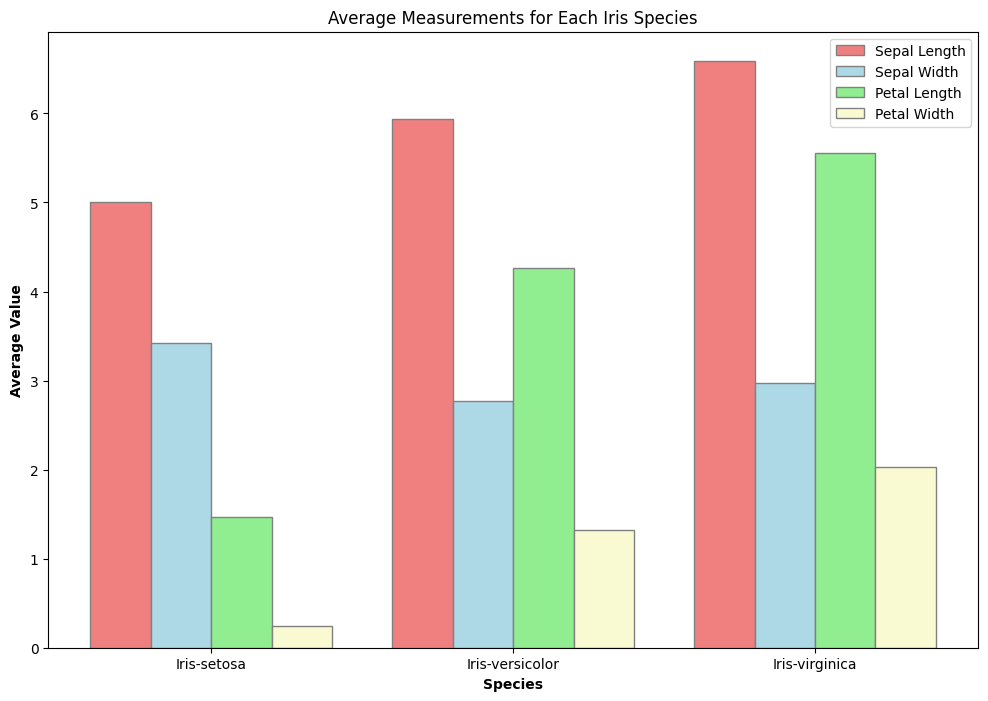

In [11]:
# Define the bar width
bar_width = 0.2

# Define light colors for each feature
light_colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightgoldenrodyellow']

# Set the position of the bars on the x-axis
r1 = np.arange(len(df_grouped.index))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plot
plt.figure(figsize=(12, 8))

# Create bars with light colors
plt.bar(r1, df_grouped['sepal_length'], color=light_colors[0], width=bar_width, edgecolor='grey', label='Sepal Length')
plt.bar(r2, df_grouped['sepal_width'], color=light_colors[1], width=bar_width, edgecolor='grey', label='Sepal Width')
plt.bar(r3, df_grouped['petal_length'], color=light_colors[2], width=bar_width, edgecolor='grey', label='Petal Length')
plt.bar(r4, df_grouped['petal_width'], color=light_colors[3], width=bar_width, edgecolor='grey', label='Petal Width')

# Add labels and title
plt.xlabel('Species', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.title('Average Measurements for Each Iris Species')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width * 1.5 for r in range(len(df_grouped.index))], df_grouped.index)

# Create legend & Show graphic
plt.legend()
plt.show()

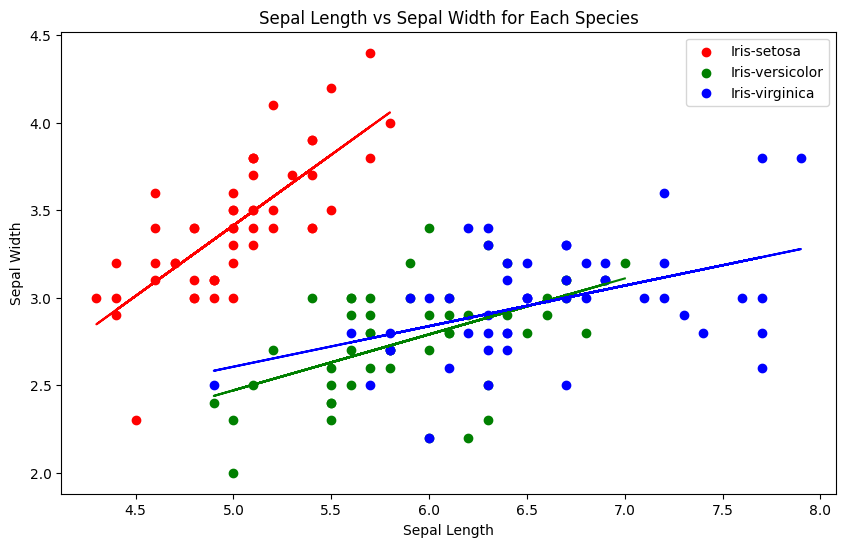

In [21]:
# Create a figure and axis for the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for each species
species_unique = df['species'].unique()
colors = ['red', 'green', 'blue']

for species, color in zip(species_unique, colors):
    subset = df[df['species'] == species]
    # Scatter plot
    plt.scatter(subset['sepal_length'], subset['sepal_width'], color=color, label=species)
    
    # Fit a regression line
    slope, intercept = np.polyfit(subset['sepal_length'], subset['sepal_width'], 1)
    plt.plot(subset['sepal_length'], slope * subset['sepal_length'] + intercept, color=color)

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width for Each Species')

# Add legend
plt.legend()

# Show the scatter plot
plt.show()

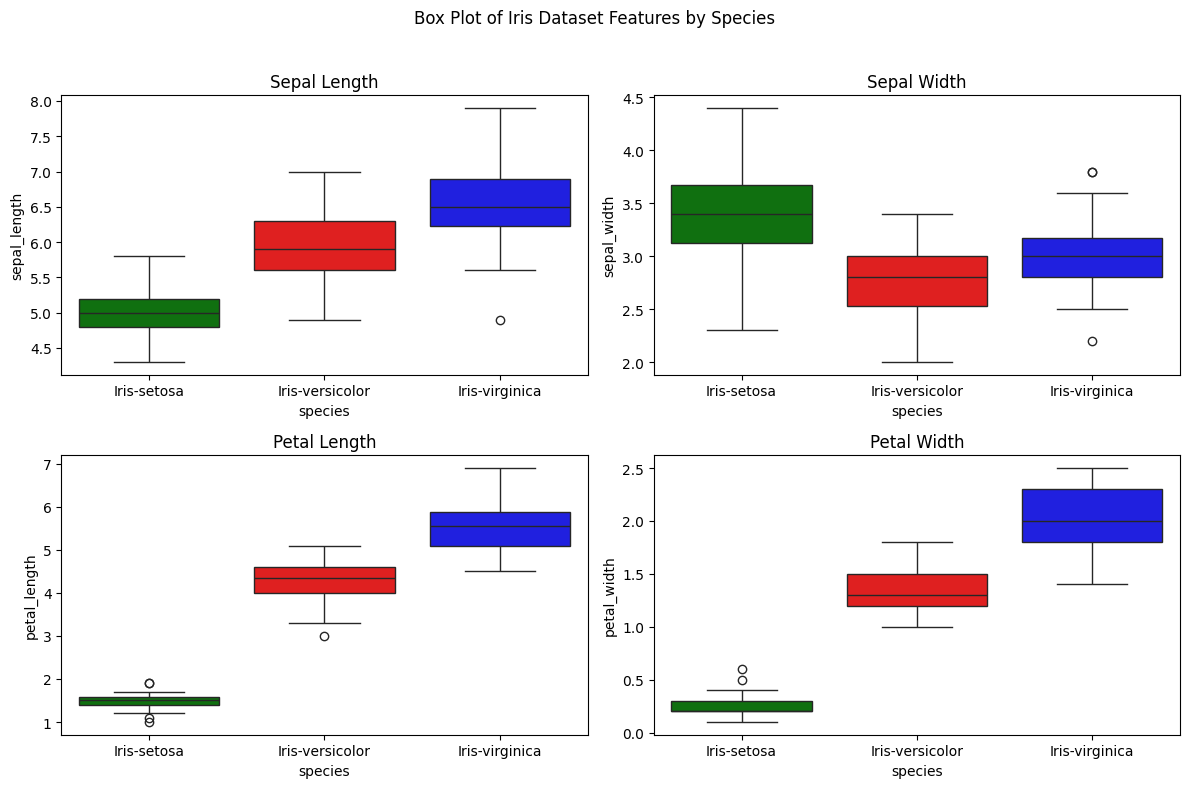

In [23]:
# Create a figure and axis for the box plot
plt.figure(figsize=(12, 8))

# Create box plots for each feature with different colors
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='species', y='sepal_length', hue='species', palette={'Iris-setosa': 'green', 'Iris-versicolor': 'red', 'Iris-virginica': 'blue'}, dodge=False, showfliers=True)
plt.title('Sepal Length')
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='species', y='sepal_width', hue='species', palette={'Iris-setosa': 'green', 'Iris-versicolor': 'red', 'Iris-virginica': 'blue'}, dodge=False, showfliers=True)
plt.title('Sepal Width')
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='species', y='petal_length', hue='species', palette={'Iris-setosa': 'green', 'Iris-versicolor': 'red', 'Iris-virginica': 'blue'}, dodge=False, showfliers=True)
plt.title('Petal Length')
plt.legend([],[], frameon=False)

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='species', y='petal_width', hue='species', palette={'Iris-setosa': 'green', 'Iris-versicolor': 'red', 'Iris-virginica': 'blue'}, dodge=False, showfliers=True)
plt.title('Petal Width')
plt.legend([],[], frameon=False)

# Add overall title and labels
plt.suptitle('Box Plot of Iris Dataset Features by Species')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the box plot
plt.show()